In [2]:
options(warn = -1)
library(dplyr) 

- 정형데이터: 머신러닝이 좋다
- 비정형데이터: 딥러닝이 좋다

### 데이터 준비하기

In [61]:
set.seed(1234)
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35)) #랜덤하게 1:50 중 35개를 가져오는 것

In [60]:
# 학습용 데이터셋
data.tr <- iris[samp,] #35개씩 난수추출
# 검증용 데이터셋
data.test <- iris[-samp,] #나머지

In [62]:
summary(data.tr)
summary(data.test)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width         Species  
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.10   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.30   versicolor:35  
 Median :5.800   Median :3.000   Median :4.300   Median :1.30   virginica :35  
 Mean   :5.847   Mean   :3.042   Mean   :3.749   Mean   :1.19                  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.80                  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.50                  

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :15  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:15  
 Median :5.800   Median :3.100   Median :4.70   Median :1.400   virginica :15  
 Mean   :5.836   Mean   :3.093   Mean   :3.78   Mean   :1.222                  
 3rd Qu.:6.500   3rd Qu.:3.400   3rd Qu.:5.10   3rd Qu.:1.900                  
 Max.   :7.700   Max.   :4.100   Max.   :6.70   Max.   :2.500                  

### 학습시키기

In [25]:
# 인공 신경망 모델을 사용한 학습을 위해 라이브러리 불러오기
library(nnet) # 뉴럴 네트워크

In [63]:
# Model 만들기
model.nnet <- nnet(Species ~ . , data = data.tr, size=3 )
# size: 은닉층 갯수, Hyper Parameter, sample수보다 작아야 함
# 같은 결과에 size가 작을 수록 좋음

# weights:  27
initial  value 121.492256 
iter  10 value 110.581609
iter  20 value 49.740861
iter  30 value 26.600820
iter  40 value 1.834814
iter  50 value 0.008937
final  value 0.000074 
converged


### 잘 학습했나 검증하기

In [64]:
# 문제 및 정답 만들기
problem <- subset(data.test, select = -Species) # x
answer = data.test$Species # y

In [65]:
par(family = 'AppleGothic', bg = '#fafafa')
# 검증하기
pred <- predict(model.nnet, problem, type = "class") 
# class: 분류된 것(객관식)
# raw: 주관식
# cbind(pred, as.character(answer))

mean(pred == answer) #정답률


[1] 0.9555556

            answer
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         13         0
  virginica       0          2        15

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
71,5.9,3.2,4.8,1.8,versicolor
84,6.0,2.7,5.1,1.6,versicolor


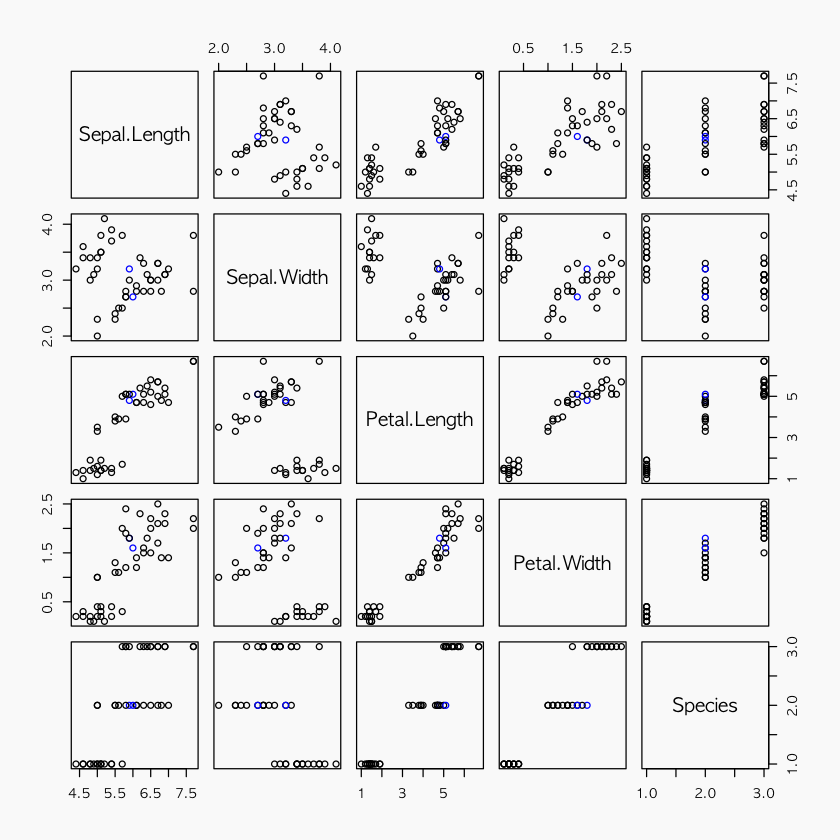

In [66]:
par(family = 'AppleGothic', bg = '#fafafa')
table(pred, answer) #뭐가 잘못 나오나 확인 > 가장 중요

subset(data.test, pred != answer)

plot(
  data.test,
  col = ifelse(pred != answer,'blue','black')
)

---
# 학습시킨 머신러닝 사용하기

In [95]:
par(family = 'AppleGothic', bg = '#fafafa')
# Sepal.Length = 5.3
# Sepal.Width = 3.3
# Petal.Length = 1.6
# Petal.Width = 0.3

n <- data.frame(5.3, 3.3, 1.6, 0.3)
colnames(n) <- colnames(iris[,1:4])
pred <- predict(model.nnet, n, type = "class") 

plot(
  rbind(data.test, n),
  col = ifelse(,'blue','black')
)

pred

ERROR: Error in rbind(deparse.level, ...): numbers of columns of arguments do not match


#  복습복습

In [17]:
iris2 <- scale(iris[,-5]) #Specis는 정규화를 할 수 없음
iris2 <- data.frame(iris2) # 현재 iris2가 dataframe이 아닌 matrix
iris2$Species <- iris$Species
head(iris2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


In [23]:
# 난수추출 번호
set.seed(1234)
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))

# 학습용 데이터셋
data.tr <- iris2[samp,]

# 테스트용 데이터셋
data.test <- iris2[-samp,]

In [25]:
# 인공신경망 불러오기
library(nnet)

# 모델 만들기: data.tr 데이터를 이용, 3계층 학습을 통해, Species를 제외한 모든 컬럼을 이용해 Species 예측
model.nnet <- nnet(Species ~ . , data=data.tr, size = 3)


# weights:  27
initial  value 124.913043 
iter  10 value 6.777899
iter  20 value 0.018147
final  value 0.000081 
converged


In [26]:
# 문제 및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

In [30]:
# Test
pred <- predict(model.nnet, x, type='class')

In [31]:
# 예측력 확인
mean(pred == y)

[1] 0.9333333

In [32]:
# 정오표 확인
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

# 주가

In [34]:
코스피 <- read.csv('Data/KRX_KOSPI.csv')
필수소비재 <- read.csv('Data/KRX_필수소비재.csv')
head(코스피)
summary(코스피)
summary(필수소비재)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '<'
1: <
    ^
